In [23]:
from astroquery.alma import Alma, get_enhanced_table
from astropy.table import Table, vstack
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib import pyplot as plt

In [8]:
obs = Alma.query_tap("select * from ivoa.obscore WHERE spatial_resolution<=1 AND gal_latitude>-0.25 AND gal_latitude<0.2 AND gal_longitude<1 AND frequency>84 AND frequency<116")
obs_table_B3_left = get_enhanced_table(obs)

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]


In [9]:
obs = Alma.query_tap("select * from ivoa.obscore WHERE spatial_resolution<=1 AND gal_latitude>-0.25 AND gal_latitude<0.2 AND gal_longitude>359 AND frequency>84 AND frequency<116")
obs_table_B3_right = get_enhanced_table(obs)

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]


In [13]:
obs_table_B3 = vstack([obs_table_B3_left, obs_table_B3_right])

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]


In [18]:
path_to_mosaic = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/12m_continuum_commonbeam_circular_reimaged_mosaic.fits'
mosaic_hdul = fits.open(path_to_mosaic)
data = mosaic_hdul[0].data
wcs_aces = WCS(mosaic_hdul[0].header)

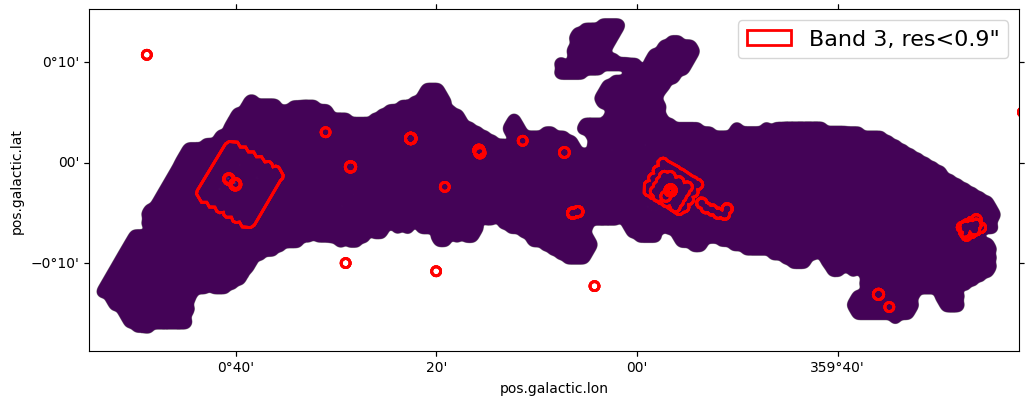

In [24]:
tick_fontsize = 14
fontsize = 16
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(projection=wcs_aces)
im = ax.imshow(data)

for obs_ in obs_table_B3:
    pix_region = obs_['s_region'].to_pixel(wcs_aces)
    pix_region.plot(ax=ax, edgecolor='red', lw=2)
pix_region.plot(ax=ax, edgecolor='red', lw=2, label='Band 3, res<0.9"')
plt.legend(fontsize=fontsize)

In [26]:
from astropy.table import Table

In [42]:
B1_off = Table.read('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/dbcat/SgrB1off.dbcat_originalbeam_publish.txt', format='ascii')
Sgr_C = Table.read('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/dbcat/SgrC.dbcat_originalbeam_publish.txt', format='ascii')
kms20 = Table.read('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/dbcat/The20kmsCloud.dbcat_originalbeam_publish.txt', format='ascii')

In [88]:
from regions import Region, EllipseSkyRegion, PointSkyRegion, Regions
from astropy.coordinates import SkyCoord
import astropy.units as u

In [70]:
B1_off['THETA01']*u.deg

<Quantity [102.6  , 159.6  , 132.6  , 149.9  , 111.8  , 150.4  , 137.3  ,
           130.7  , 116.6  , 136.6  , 133.8  , 128.   , 147.   , 112.4  ,
            93.9  , 141.9  , 111.8  ,  90.07 , 119.4  , 135.8  ,  87.76 ,
            96.45 , 143.2  ,  96.15 , 130.3  ,  47.26 , 111.8  , 123.2  ,
           158.1  , 105.   , 122.   , 106.4  ,  79.84 ,  88.2  , 130.9  ,
           131.   , 115.5  , 133.7  , 111.9  ,  89.12 , 148.8  ,  79.72 ,
           112.8  ,  88.75 , 143.2  ,   4.327, 108.4  , 135.3  , 130.8  ,
            80.22 ,  92.11 , 167.2  ,  17.51 , 131.7  ,  38.01 , 135.9  ,
           128.1  , 141.7  , 103.7  , 150.8  , 102.7  , 180.   ] deg>

In [98]:
def regions_from_table(table):
    coords = SkyCoord(table['RA(hms)'], table['DEC(dms)'], unit = ('hourangle', 'deg'))
    theta = table['THETA01']*u.deg
    major_axes = []
    minor_axes = []
    column_data = table['FWHM_OBS01_str']
    for entry in column_data:
        major, minor = entry.split("$\\times$")  # Splitting at the separator
        major_axes.append(float(major)*u.arcsec)
        minor_axes.append(float(minor)*u.arcsec) 

    list_of_regions = []
    for i in range(len(coords)):
        regions = EllipseSkyRegion(center=coords[i], height=major_axes[i], width=minor_axes[i], angle=theta[i])
        list_of_regions.append(regions)
    regions = Regions(list_of_regions)

    return regions

In [99]:
B1_off_regions = regions_from_table(B1_off)
Sgr_C_regions = regions_from_table(Sgr_C)
kms20_regions = regions_from_table(kms20)

In [100]:
Regions.write(B1_off_regions, 'B1_off.reg', overwrite=True)
Regions.write(Sgr_C_regions, 'Sgr_C.reg', overwrite=True)
Regions.write(kms20_regions, '20kms.reg', overwrite=True)